In [108]:
!pip install vaderSentiment
!pip install pyLDAvis
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 13.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_versio

In [109]:
!pip install --upgrade scipy numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 73.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.3 which is incompatible.
numba 0.60.0 requires 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
"""
import librarys and download nltk stopwords
"""

import json, re, string
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
"""
set up tokneization and stemming tools for data pre-processing
"""

abbreviations = {
    "lol": "laugh out loud",
    "brb": "be right back",
    "idk": "i don't know",
    "imo": "in my opinion",
    "omg": "oh my god",
    "btw": "by the way",
    "rn": "right now",
    "lmao": "laughing my ass off",
    "rofl": "rolling on the floor laughing",
    "wtf": "what the fuck",
    "smh": "shaking my head",
    "tbh": "to be honest",
    "fyi": "for your information",
    "bff": "best friends forever",
    "ftw": "for the win",
    "irl": "in real life",
    "fml": "fuck my life",
    "ffs": "for fuck's sake"
}

def replace_abbreviations(text):
    for abbr, full in abbreviations.items():
      text = re.sub(r'\b' + re.escape(abbr) + r'\b', full, text, flags=re.IGNORECASE)
    return text


def processText(text, tokenizer, stopwords):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    text = replace_abbreviations(text)
    tokens = tokenizer.tokenize(text)
    tokens = [t.strip() for t in tokens]
    return [tok for tok in tokens if tok not in stopwords and not tok.isdigit()]

def clean_text_forVADER(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove escape characters
    text = text.replace('\\', '').replace('\n', ' ').replace('\t', ' ')
    # Normalize whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    # Replace Abbrs
    text = replace_abbreviations(text)

    return text

In [ ]:
import datetime

def analyze_reddit_data(data, analyzer):
    result = []

    for entry in data:
        # clean the text for VADER
        text = clean_text_forVADER(entry['text'])
        # VADER analysis on text
        text_score = analyzer.polarity_scores(text)['compound']

        # change utc to datetime
        created_datetime = datetime.datetime.utcfromtimestamp(entry['created_utc'])

        result.append({
            'id': entry['id'],
            'text_score': round(text_score, 4),
            'datetime': created_datetime,
            'type': entry['type'],
            'subreddit': entry['subreddit'],
            'likes': entry['score']
        })

    return result

In [ ]:
def analyze_youtube_data(data, analyzer):
    result = []

    for video in data:
        # Title sentiment
        title_text = clean_text_forVADER(video['title'])
        title_score = analyzer.polarity_scores(title_text)['compound']

        # Comment sentiment (weighted by like_count)
        # only calculate comment sentiment if there is at least 1 comment
        if video['comment_count'] > 0:
            scores = 0
            weights = 0
            for comment in video['comments']:
                comment_text = clean_text_forVADER(comment['text'])
                score = analyzer.polarity_scores(comment_text)['compound']
                weight = comment.get('like_count', 0) + 1  # prevent zero weight
                scores += score * weight
                weights += weight

            comments_score = score / weights
            alignment_score = 1 - abs(title_score - comments_score)
        # otherwise set both comment sentimental score and alignment score to 0
        else:
            comments_score = None
            alignment_score = None

        result.append({
            'video_id': video['video_id'],
            'title_score': round(title_score, 4),
            'comments_score': round(comments_score, 4) if comments_score is not None else None,
            'alignment_score': round(alignment_score, 4) if alignment_score is not None else None,
            'comment_count': video['comment_count']
        })

    return result

In [82]:
def analyze_combined_data(reddit_data, youtube_data, analyzer):
    result = []
    i = 0
    for reddit_entry in reddit_data:
        i += 1
        if reddit_entry['type'] == 'comment':
            # clean the text for VADER
            text = clean_text_forVADER(entry['text'])
            # VADER analysis on text
            text_score = analyzer.polarity_scores(text)['compound']

            # change utc to datetime
            created_datetime = datetime.datetime.utcfromtimestamp(entry['created_utc'])

            result.append({
              'id': str(i),
              'score': round(text_score, 4),
              'datetime': created_datetime,
              'platform': 'reddit',
              'likes': entry['score']
            })


    for video in youtube_data:
        if 'comments' in video:
            for comment in video['comments']:
                i += 1
                # clean the text for VADER
                comment_text = clean_text_forVADER(comment['text'])
                # VADER analysis on text
                score = analyzer.polarity_scores(comment_text)['compound']

                result.append({
                  'id': str(i),
                  'score': round(score, 4),
                  'datetime': pd.to_datetime(comment['published_at'], utc=True),
                  'platform': 'youtube',
                  'likes': comment['like_count']
                 })
        else:
            continue

    return result

In [ ]:
import os as os

# Set your desired working path
working_dir = '/content/drive/MyDrive/RMIT/Assignment_2_Social_Media' #change it to your google drive or local folders containing the data files

# Change the current working directory
os.chdir(working_dir)

# Confirm it's changed
print("Current working directory:", os.getcwd())

Current working directory: /content/drive/MyDrive/RMIT/Assignment_2_Social_Media


In [ ]:
# Preprocessing Youtube data
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

with open("youtube_comments.json", "r", encoding="utf-8") as f:
    youtube_data = json.load(f)

with open("reddit_data.json", "r", encoding="utf-8") as f:
    reddit_data = json.load(f)


In [ ]:
sentiment_youtube = analyze_youtube_data(youtube_data, analyzer)

In [ ]:
sentiment_reddit = analyze_reddit_data(reddit_data, analyzer)

In [83]:
sentiment_combined = analyze_combined_data(reddit_data, youtube_data, analyzer)

In [102]:
type(sentiment_combined[1]['datetime'])

datetime.datetime

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# transform data into dataframe for better analyzing
df_reddit = pd.DataFrame(sentiment_reddit)
df_reddit['datetime'] = pd.to_datetime(df_reddit['datetime'])
# transform youtube data into datframe for better analyzing
df_youtube = pd.DataFrame(sentiment_youtube)
# transform combined data into datframe for better analyzing
df_combined = pd.DataFrame(sentiment_combined)

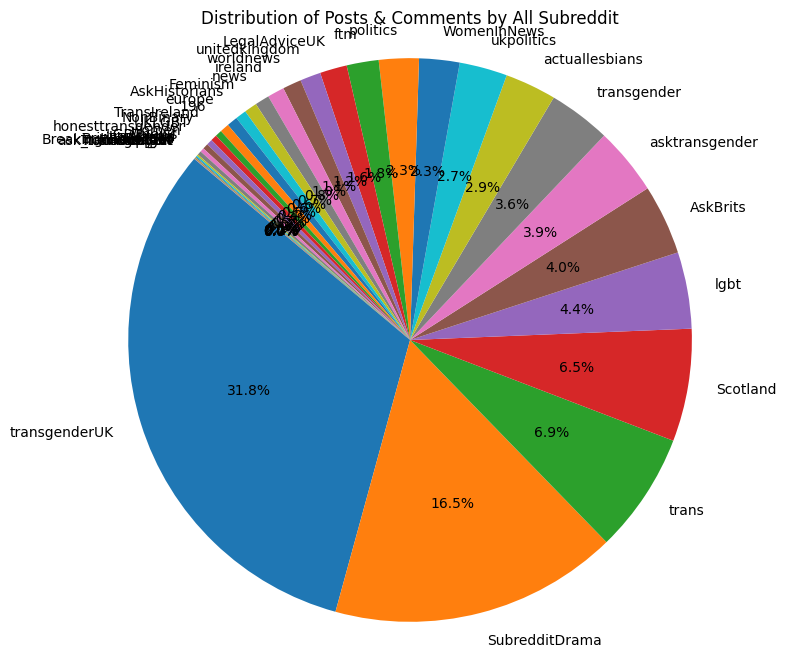

In [ ]:
# Count the number of entries per subreddit
subreddit_counts = df_reddit['subreddit'].value_counts()



# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(subreddit_counts, labels=subreddit_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Posts & Comments by All Subreddit')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular.
plt.show()

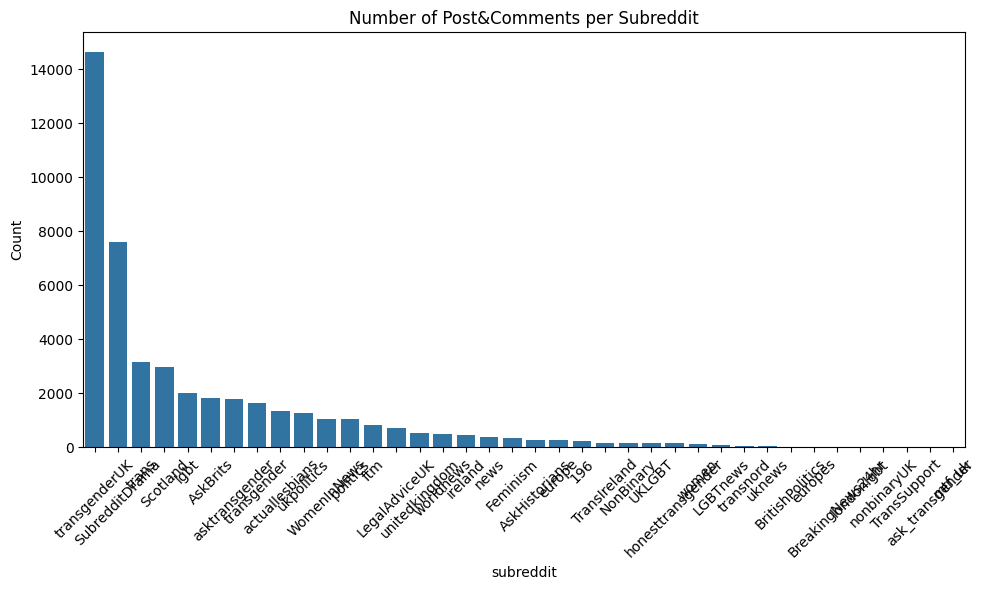

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_reddit, x='subreddit', order=df_reddit['subreddit'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Number of Post&Comments per Subreddit')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

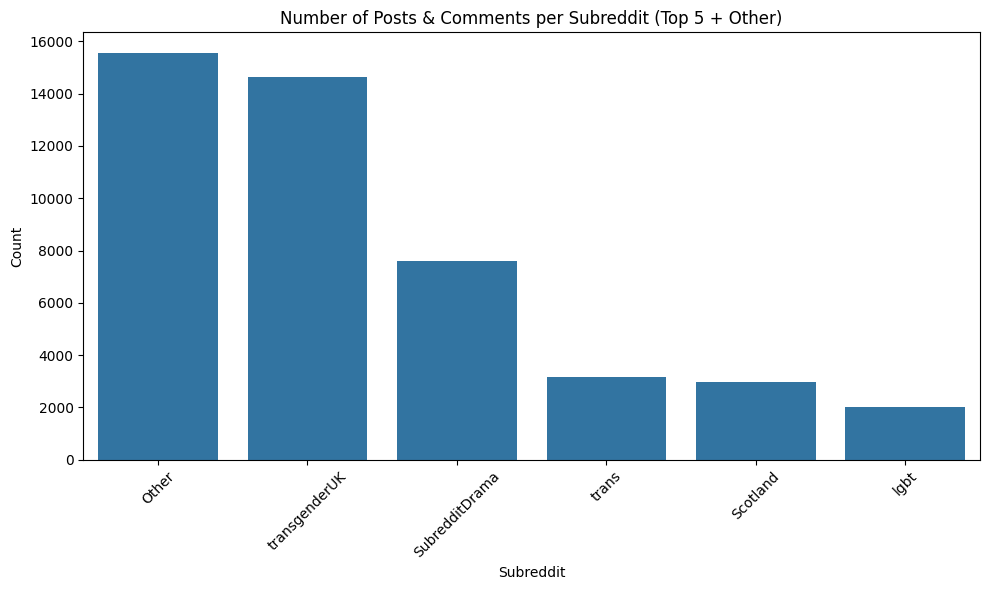

In [ ]:
'''
analyzing and visualizing the reddit data
'''

# first we will check the top 5 subreddit who has the most number of posts and comments
# Get the top 5 subreddits
top_subreddits = df_reddit['subreddit'].value_counts().nlargest(5).index

# Create a new column for plotting where others are grouped as 'Other'
df_reddit['subreddit_grouped'] = df_reddit['subreddit'].apply(
    lambda x: x if x in top_subreddits else 'Other'
)

# Reorder by count for better bar chart order
ordered_subreddits = df_reddit['subreddit_grouped'].value_counts().index

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_reddit, x='subreddit_grouped', order=ordered_subreddits)
plt.xticks(rotation=45)
plt.title('Number of Posts & Comments per Subreddit (Top 5 + Other)')
plt.ylabel('Count')
plt.xlabel('Subreddit')
plt.tight_layout()
plt.show()

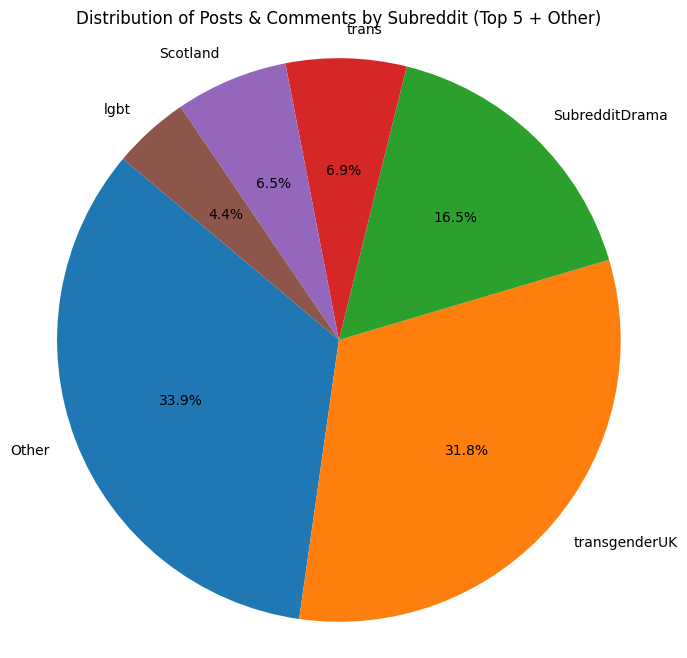

In [ ]:
# Count the number of entries per subreddit
subreddit_counts = df_reddit['subreddit_grouped'].value_counts()



# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(subreddit_counts, labels=subreddit_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Posts & Comments by Subreddit (Top 5 + Other)')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular.
plt.show()

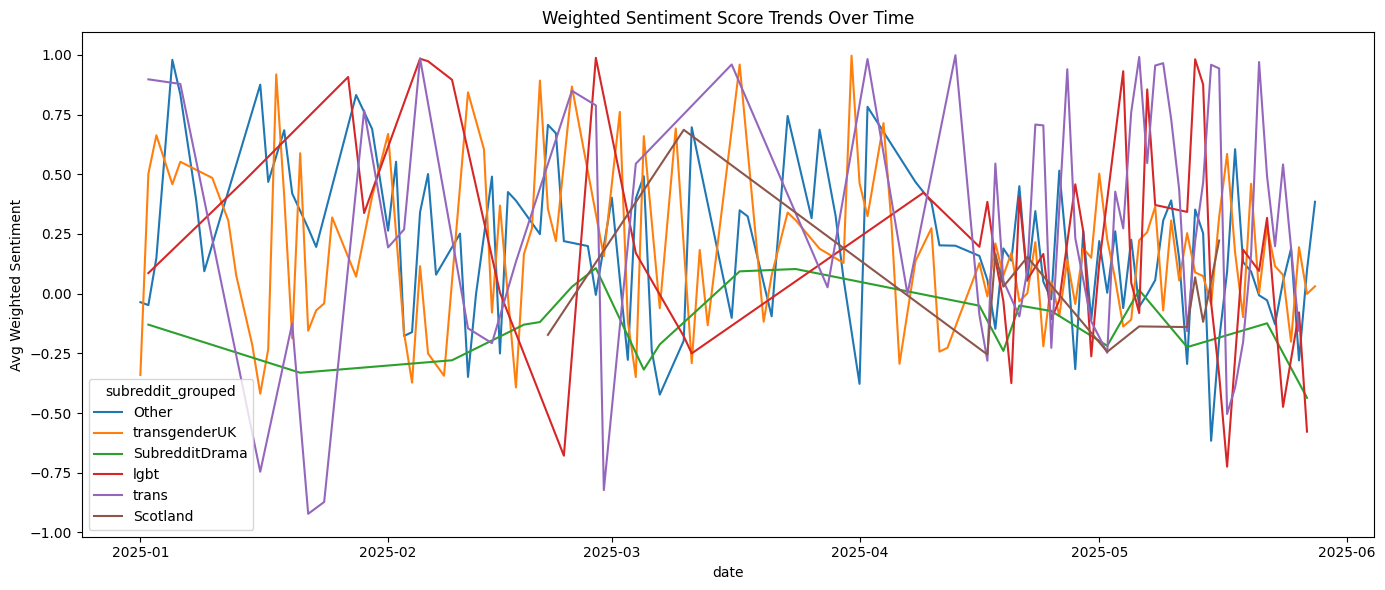

In [ ]:
df_reddit['date'] = df_reddit['datetime'].dt.date  

# Weighted sentiment = sum(text_score * likes) / sum(likes)
df_reddit['weighted_score'] = df_reddit['text_score'] * df_reddit['likes']

trend_df_reddit = df_reddit.groupby(['date', 'subreddit_grouped']).agg({
    'weighted_score': 'sum',
    'likes': 'sum'
}).reset_index()

trend_df_reddit['avg_weighted_score'] = trend_df_reddit['weighted_score'] / trend_df_reddit['likes']

plt.figure(figsize=(14, 6))
sns.lineplot(data=trend_df_reddit, x='date', y='avg_weighted_score', hue='subreddit_grouped')
plt.title('Weighted Sentiment Score Trends Over Time')
plt.ylabel('Avg Weighted Sentiment')
plt.tight_layout()
plt.show()


In [ ]:
'''
Group the subreddit into two categroies, "LGBT-related" and "Other"
'''

import re

# Find the top 1 subreddit by count
top_subreddit = df_reddit['subreddit'].value_counts().idxmax()

# Define the LGBT-related keywords
lgbt_keywords = ["trans", "lgbt", "nonbinary", "queer", "gay", "lesbian"]

# Compile a regex pattern for faster matching
pattern = re.compile('|'.join(lgbt_keywords), re.IGNORECASE)

# Create a new column for grouping
def categorize_subreddit(name):
    if name == top_subreddit:
        return top_subreddit 
    elif pattern.search(name):  # If name contains any LGBT keywords
        return 'LGBT-related'
    else:
        return 'Other'

df_reddit['subreddit_grouped'] = df_reddit['subreddit'].apply(categorize_subreddit)

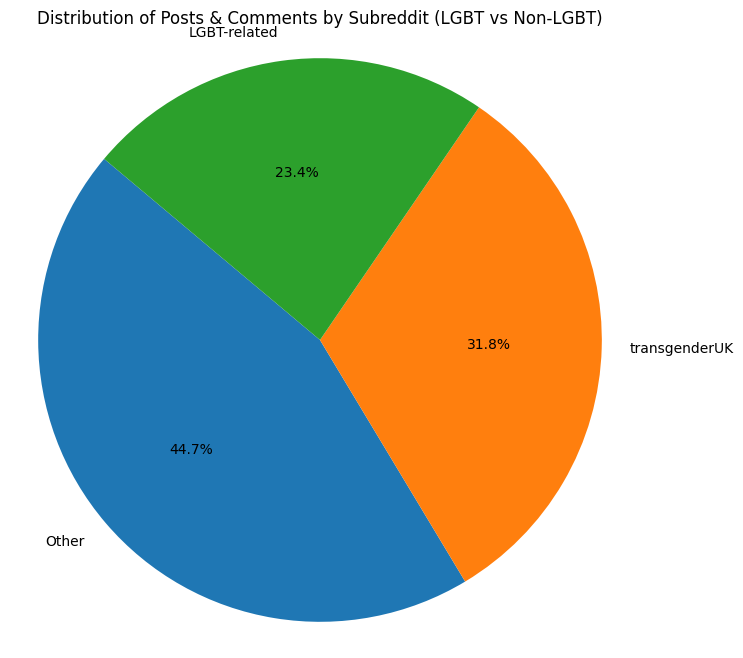

In [ ]:
# Count the number of entries per subreddit
subreddit_counts = df_reddit['subreddit_grouped'].value_counts()



# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(subreddit_counts, labels=subreddit_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Posts & Comments by Subreddit (LGBT vs Non-LGBT)')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular.
plt.show()

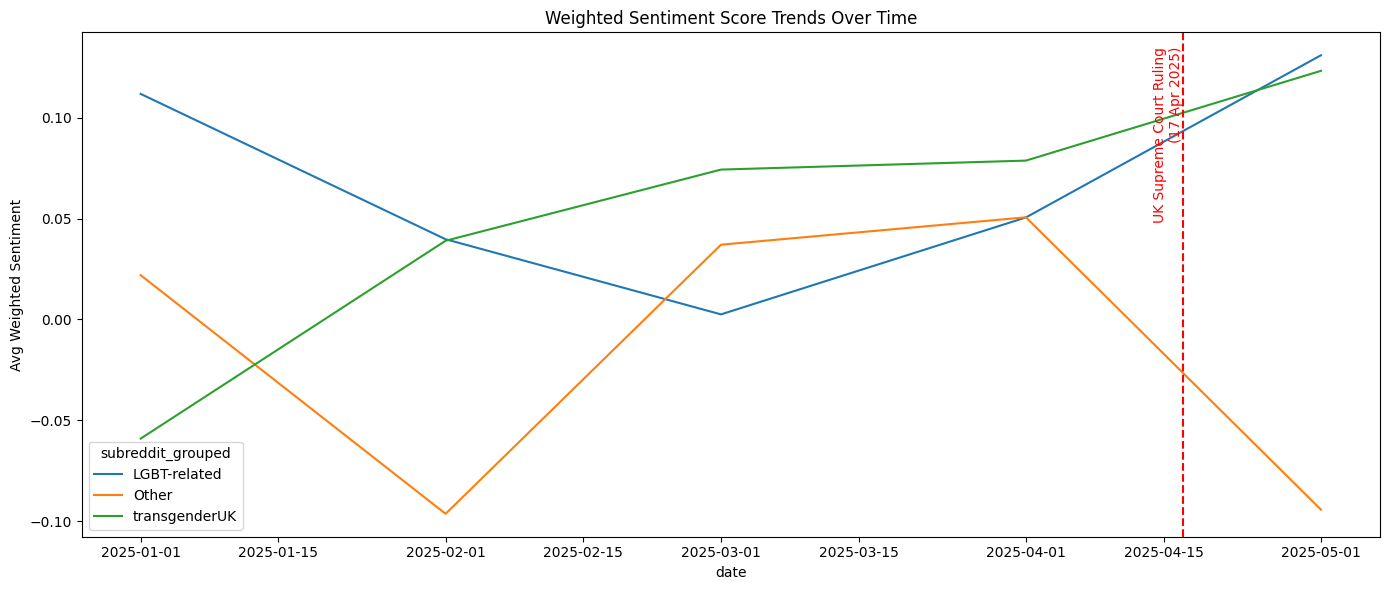

In [ ]:
df_reddit['date'] = df_reddit['datetime'].dt.to_period('M').dt.start_time  

# Weighted sentiment = sum(text_score * likes) / sum(likes)
df_reddit['weighted_score'] = df_reddit['text_score'] * df_reddit['likes']

trend_df_reddit = df_reddit.groupby(['date', 'subreddit_grouped']).agg({
    'weighted_score': 'sum',
    'likes': 'sum'
}).reset_index()

trend_df_reddit['avg_weighted_score'] = trend_df_reddit['weighted_score'] / trend_df_reddit['likes']

plt.figure(figsize=(14, 6))
sns.lineplot(data=trend_df_reddit, x='date', y='avg_weighted_score', hue='subreddit_grouped')
plt.title('Weighted Sentiment Score Trends Over Time')
plt.ylabel('Avg Weighted Sentiment')

# Add vertical line and annotation for April 17, 2025
highlight_date = pd.to_datetime("2025-04-17")
plt.axvline(x=highlight_date, color='red', linestyle='--', linewidth=1.5, label="UK Supreme Court Ruling")

plt.text(highlight_date, plt.ylim()[1]*0.95, 'UK Supreme Court Ruling\n(17 Apr 2025)',
         color='red', rotation=90, verticalalignment='top', horizontalalignment='right')

plt.tight_layout()
plt.show()

<ipython-input-22-460c612cbb3e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=trend_df_reddit, x='subreddit_grouped', y='avg_weighted_score', palette='Set2')


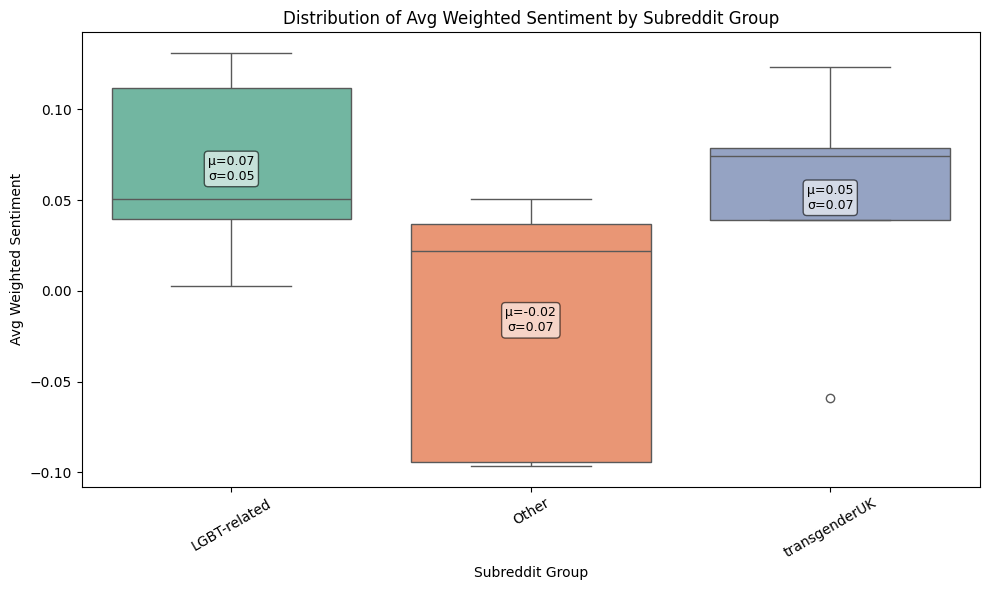

In [ ]:
# First, calculate stats per group
stats = trend_df_reddit.groupby('subreddit_grouped')['avg_weighted_score'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=trend_df_reddit, x='subreddit_grouped', y='avg_weighted_score', palette='Set2')

# Add text annotations inside each box at the mean line
for i, row in stats.iterrows():
    label = f"μ={row['mean']:.2f}\nσ={row['std']:.2f}"
    plt.text(
        i,                         # x position (group index)
        row['mean'],               # y position (place at mean value)
        label,                     # text label
        ha='center', va='center', # center alignment
        fontsize=9,
        color='black',
        bbox=dict(facecolor='white', alpha=0.6, boxstyle='round,pad=0.3')
    )

plt.title('Distribution of Avg Weighted Sentiment by Subreddit Group')
plt.xlabel('Subreddit Group')
plt.ylabel('Avg Weighted Sentiment')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

<ipython-input-27-048c2b2df876>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Score Type', y='Sentiment Score', data=melted_df_youtube,


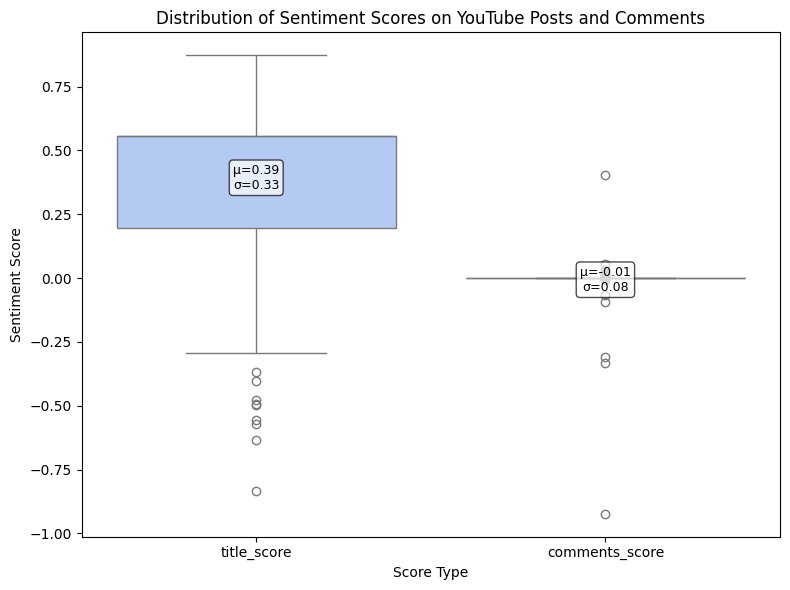

In [ ]:
'''
analyzing and visualizing the youtube data
'''

# Melt the DataFrame to long format for boxplotting
melted_df_youtube = df_youtube.melt(
    value_vars=['title_score', 'comments_score'],
    var_name='Score Type',
    value_name='Sentiment Score'
)

# Drop rows with None or NaN sentiment scores
melted_df_youtube = melted_df_youtube.dropna(subset=['Sentiment Score'])

# Recalculate stats with correct index matching the boxplot's x-axis categories
score_types = melted_df_youtube['Score Type'].unique().tolist()
stats = melted_df_youtube.groupby('Score Type')['Sentiment Score'].agg(['mean', 'std'])

# Ensure order matches seaborn's plotting
stats = stats.loc[score_types]

# Create the boxplot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Score Type', y='Sentiment Score', data=melted_df_youtube,
                 palette='coolwarm', order=score_types)

# Add stats labels inside the boxes
for i, score_type in enumerate(score_types):
    row = stats.loc[score_type]
    text = f"μ={row['mean']:.2f}\nσ={row['std']:.2f}"
    plt.text(
        i, row['mean'],
        text,
        ha='center', va='center',
        fontsize=9,
        color='black',
        bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.3')
    )

plt.title('Distribution of Sentiment Scores on YouTube Posts and Comments')
plt.tight_layout()
plt.show()



<Axes: >

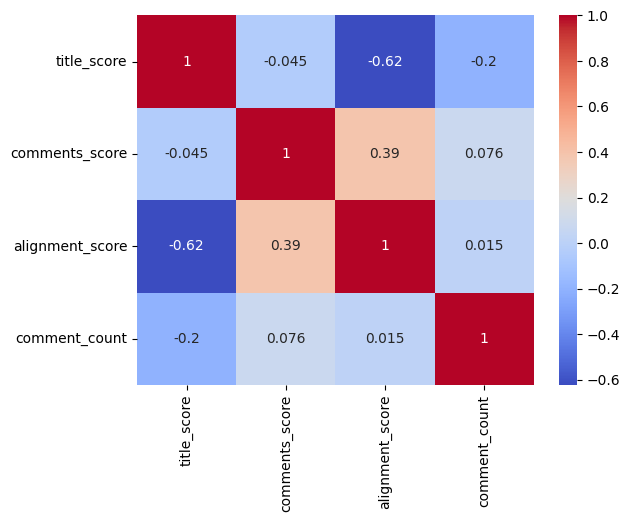

In [ ]:
# trying to find correlations between attributes in youtube data

# Filter out rows where comments_score is None (so scatterplot works)
filtered_df_youtube = df_youtube[df_youtube['comments_score'].notnull()]

df = pd.DataFrame(filtered_df_youtube)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

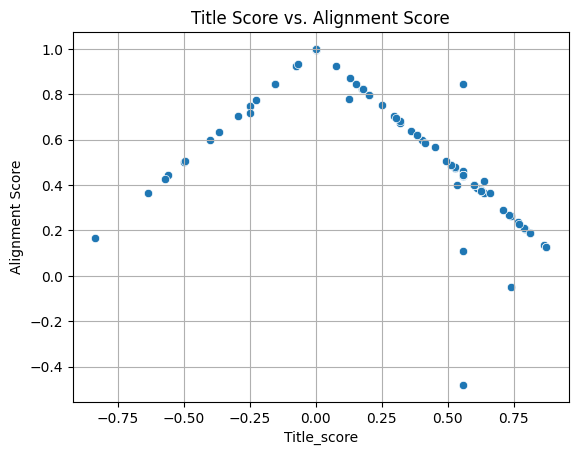

In [ ]:
sns.scatterplot(
    x='title_score',
    y='alignment_score',
    data=filtered_df_youtube,

)

plt.xlabel('Title_score')
plt.ylabel('Alignment Score')
plt.title('Title Score vs. Alignment Score')
plt.grid(True)
plt.show()

In [96]:
'''
analyzing and visualizing the combined data
'''
# Function to compute weighted mean and standard deviation
def weighted_avg_and_std(group):
    scores = group['score']
    weights = group['likes']
    weighted_mean = np.average(scores, weights=weights)
    # Weighted variance formula
    variance = np.average((scores - weighted_mean) ** 2, weights=weights)
    weighted_std = np.sqrt(variance)
    return pd.Series({'weighted_mean': weighted_mean, 'weighted_std': weighted_std})

# Apply to each platform group
weighted_stats = df_combined.groupby('platform').apply(weighted_avg_and_std)

# Display as a pretty text table
print("\nWeighted Sentiment Statistics by Platform:\n")
print(weighted_stats.to_markdown(tablefmt="grid"))


Weighted Sentiment Statistics by Platform:

+------------+-----------------+----------------+
| platform   |   weighted_mean |   weighted_std |
+============+=================+================+
| reddit     |       0.9846    |    2.22045e-16 |
+------------+-----------------+----------------+
| youtube    |       0.0250317 |    0.499993    |
+------------+-----------------+----------------+


<ipython-input-96-55f9051f14ed>:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_stats = df_combined.groupby('platform').apply(weighted_avg_and_std)


/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:413: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


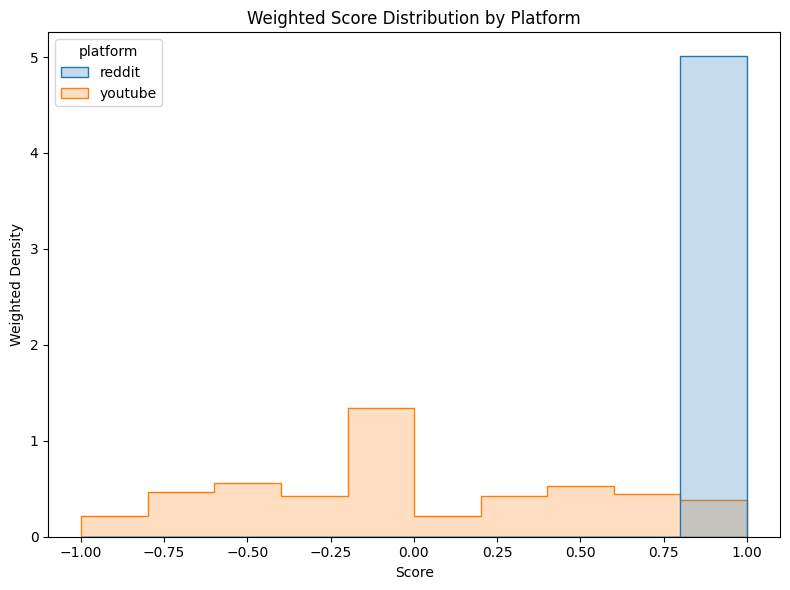

In [95]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_combined, x='score', weights='likes', hue='platform', element='step', stat='density', common_norm=False)
plt.title("Weighted Score Distribution by Platform")
plt.xlabel("Score")
plt.ylabel("Weighted Density")
plt.tight_layout()
plt.show()

<ipython-input-98-3a1a1b60c9c4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_weighted, x='platform', y='score', palette='Set2')


<Axes: xlabel='platform', ylabel='score'>

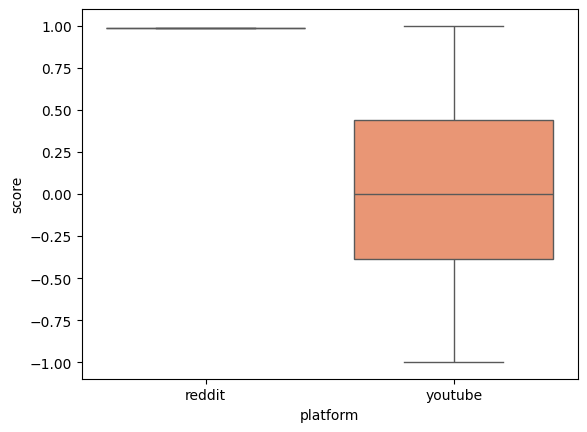

In [98]:
df_weighted = df.loc[df_combined.index.repeat(df_combined['likes'].astype(int))]
sns.boxplot(data=df_weighted, x='platform', y='score', palette='Set2')

In [113]:
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [141]:
from collections import Counter
import math
import pyLDAvis
import pyLDAvis.lda_model
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


In [137]:
def display_topics(model, featureNames, numTopWords):
    """
    Prints out the most associated words for each feature.

    @param model: lda model.
    @param featureNames: list of strings, representing the list of features/words.
    @param numTopWords: number of words to print per topic.
    """

    # print out the topic distributions
    for topicId, lTopicDist in enumerate(model.components_):
        print("Topic %d:" % (topicId))
        print(" ".join([featureNames[i] for i in lTopicDist.argsort()[:-numTopWords - 1:-1]]))

def displayWordcloud(model, featureNames):
    """
    Displays the word cloud of the topic distributions, stored in model.

    @param model: lda model.
    @param featureNames: list of strings, representing the list of features/words.
    """

    # this normalises each row/topic to sum to one
    normalisedComponents = model.components_ / model.components_.sum(axis=1)[:, np.newaxis]

    topicNum = len(model.components_)
    # number of wordclouds for each row
    plotColNum = 3
    # number of wordclouds for each column
    plotRowNum = int(math.ceil(topicNum / plotColNum))

    for topicId, lTopicDist in enumerate(normalisedComponents):
        lWordProb = {featureNames[i] : wordProb for i,wordProb in enumerate(lTopicDist)}
        wordcloud = WordCloud(background_color='black')
        wordcloud.fit_words(frequencies=lWordProb)
        plt.subplot(plotRowNum, plotColNum, topicId+1)
        plt.title('Topic %d:' % (topicId+1))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")

    plt.show(block=True)

In [127]:
tokenizer = TweetTokenizer()
stop_words = stopwords.words('english') + list(string.punctuation) + ['via']

reddit_all_tokens = []

for entry in reddit_data:
    text = entry.get("text", "")
    tokens = processText(text, tokenizer, stop_words)
    reddit_all_tokens.append(tokens)


In [129]:
youtube_all_tokens = []

for video in youtube_data:
    for comment in video.get("comments", []):
        text = comment.get("text", "")
        tokens = processText(text, tokenizer, stop_words)
        youtube_all_tokens.append(tokens)


In [110]:
# setting up LDA parameters

# number of topics to discover (default = 10)
topicNum = 3

# maximum number of words to display per topic (default = 10)
wordNumToDisplay = 5

# this is the number of features/words to used to describe our documents
featureNum = 500

In [143]:
# extract the tokenized texts from all posts in reddit
lreddit = [' '.join(tokens) for tokens in reddit_all_tokens]

# Count Vectorizer
tfVectorizer_reddit = CountVectorizer(max_df=0.95, min_df=2, max_features=featureNum, stop_words='english')
tf_reddit = tfVectorizer_reddit.fit_transform(lreddit)
# extract the names of the features (in our case, the words)
tfFeatureNames_reddit = tfVectorizer_reddit.get_feature_names_out()


# LDA MODEL
ldaModel_reddit = LatentDirichletAllocation(n_components =topicNum, max_iter=10, learning_method='online').fit(tf_reddit)

In [144]:
display_topics(ldaModel_reddit, tfFeatureNames_reddit, wordNumToDisplay)

Topic 0:
post years work time got
Topic 1:
people like think know trans
Topic 2:
trans women gender people men


In [145]:
panel = pyLDAvis.lda_model.prepare(ldaModel_reddit, tf_reddit, tfVectorizer_reddit, mds='tsne', n_jobs=1)
pyLDAvis.display(panel)

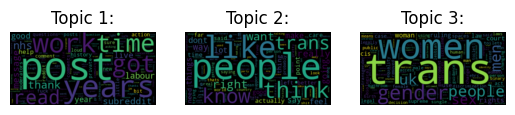

In [146]:
displayWordcloud(ldaModel_reddit, tfFeatureNames_reddit)

In [147]:
# extract the tokenized texts from all posts in reddit
lyoutube = [' '.join(tokens) for tokens in youtube_all_tokens]

# Count Vectorizer
tfVectorizer_youtube = CountVectorizer(max_df=0.95, min_df=2, max_features=featureNum, stop_words='english')
tf_youtube = tfVectorizer_youtube.fit_transform(lyoutube)
# extract the names of the features
tfFeatureNames_youtube = tfVectorizer_youtube.get_feature_names_out()

# LDA MODEL
ldaModel_youtube = LatentDirichletAllocation(n_components =topicNum, max_iter=10, learning_method='online').fit(tf_youtube)

In [148]:
display_topics(ldaModel_youtube, tfFeatureNames_youtube, wordNumToDisplay)

Topic 0:
people like gender woman know
Topic 1:
women trans men woman man
Topic 2:
court sense common uk supreme


In [149]:
panel = pyLDAvis.lda_model.prepare(ldaModel_youtube, tf_youtube, tfVectorizer_youtube, mds='tsne', n_jobs=1)
pyLDAvis.display(panel)

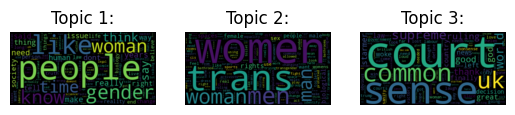

In [150]:
displayWordcloud(ldaModel_youtube, tfFeatureNames_youtube)